# Prediction - Database 2

The goal is to develop and compare different classification models to predict the presence or absence of heart disease based on the given features. 

## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

# Viz mantra

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [24]:
# Model & split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from imblearn.under_sampling import RandomUnderSampler

import joblib

## Read the database

In [39]:
df = pd.read_csv('data/data_clean/heart_disease_clean.csv')

In [40]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


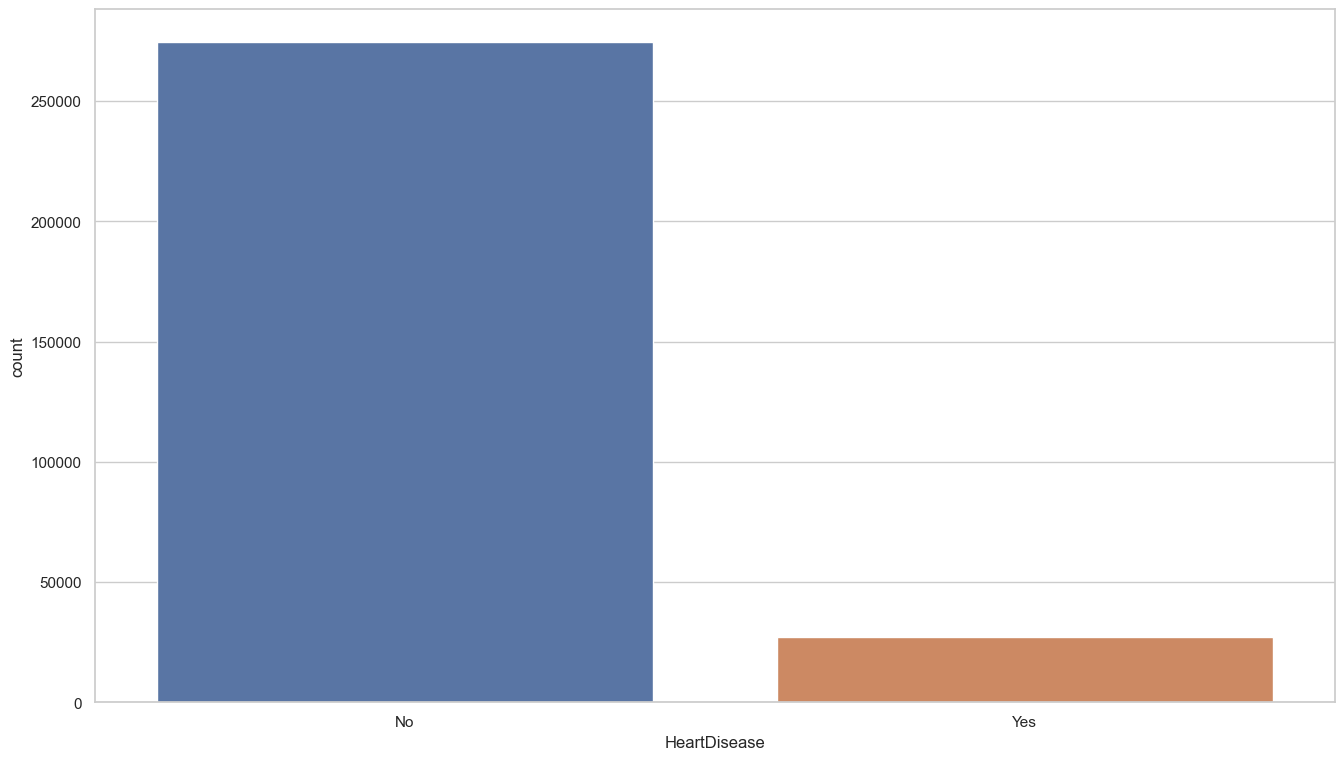

In [41]:
sns.countplot(x=df.HeartDisease);

In [42]:
df.HeartDisease.value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

### Categorical variables

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label=LabelEncoder()
for col in df:
    df[col]=label.fit_transform(df[col])
df 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
301713,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
301714,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
301715,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


## Modeling

In [45]:
# Select the data
X = df.drop("HeartDisease", axis=1) # df
y = df.HeartDisease # series

In [46]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
# Perform undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [48]:
# Define the models
models = {
    "logistic_reg": LogisticRegression(),
    "disc_analysis": LinearDiscriminantAnalysis(),
    "knc": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "svc": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [18]:
# Fit the models to the resampled data
for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train_resampled, y_train_resampled)

Training: logistic_reg
Training: disc_analysis
Training: knc
Training: GaussianNB
Training: DecisionTreeClassifier
Training: svc
Training: RandomForestClassifier


In [19]:
# Print the models metrics
for name, model in models.items():
    print(f"------------------")
    print(model)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred)}")

------------------
LogisticRegression()
Accuracy: 0.7000132573246719
Precision: 0.1944583413507793
Recall: 0.7487035116313528
F1 score: 0.3087309830757011
------------------
LinearDiscriminantAnalysis()
Accuracy: 0.7247911971364178
Precision: 0.21182326805989798
Recall: 0.7629278411616536
F1 score: 0.33158386193128764
------------------
KNeighborsClassifier()
Accuracy: 0.6554288744531354
Precision: 0.1632010081915564
Recall: 0.6907690028152319
F1 score: 0.2640237859266601
------------------
GaussianNB()
Accuracy: 0.789844889301339
Precision: 0.23234342840341077
Recall: 0.5854200622314417
F1 score: 0.33265976256630464
------------------
DecisionTreeClassifier()
Accuracy: 0.6701047328649079
Precision: 0.1624539329188847
Recall: 0.6466143132315899
F1 score: 0.2596691657741283
------------------
SVC()
Accuracy: 0.7306111626673737
Precision: 0.15374802265652907
Recall: 0.44643650911246113
F1 score: 0.22872542321415013
------------------
RandomForestClassifier()
Accuracy: 0.7130054355031155


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
# Instantiate the gradient boosting classifier
model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    random_state=42)

# Train the model on the undersampled data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

In [62]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7288877104600292
Precision: 0.22548622366288493
Recall: 0.8065217391304348
F1 score: 0.35243825205826473


In [69]:
# Save the model to a file
import pickle
with open('model/modelo.pkl', 'wb') as modelo:
    pickle.dump(model, modelo)

In [70]:
# Print the most important features 
dict_ = {}

for j, k in zip(df.columns[1:], imp):
    dict_[j] = k
    
    
sorted_dict = sorted(dict_.items(), key=lambda x:x[1], reverse=True)
sorted_dict

[('AgeCategory', 0.4854757946925624),
 ('GenHealth', 0.12493814227044205),
 ('DiffWalking', 0.07318130295221183),
 ('Stroke', 0.05665408351141364),
 ('Sex', 0.05051674447546295),
 ('BMI', 0.046827370121424135),
 ('Diabetic', 0.0467052012675409),
 ('PhysicalHealth', 0.04036014166504482),
 ('Smoking', 0.018821534229931897),
 ('KidneyDisease', 0.014818725734079514),
 ('SleepTime', 0.01374370989814455),
 ('Race', 0.009674823140915301),
 ('MentalHealth', 0.007437204085997748),
 ('Asthma', 0.003822992320694224),
 ('AlcoholDrinking', 0.0025801164411492538),
 ('SkinCancer', 0.002442919009405641),
 ('PhysicalActivity', 0.0019991941835791056)]

In [36]:
# Save the most important features as a dataframe
df_feature_importance = pd.DataFrame(sorted_dict, columns=['feature', 'importance_level'])